In [1]:
# importing libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

# Section 0) Load dataset and explain it

In [2]:
# We select iris dataset from Kaggle. İris dataset contains 4 features and 1 label with 3 classes. 
df = pd.read_csv ('IRIS.csv')
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [3]:
x1 = df.sepal_length
x2 = df.sepal_width
x3 = df.petal_length
x4 = df.petal_width
X = np.column_stack((x1,x2,x3,x4))
y = df.species
X

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [4]:
# Make train test split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123) 
print(f'Training set size is {len(X_train)} rows')
print(f'Test set size is {len(X_test)} rows')
print(f'Train + test set size is {len(X_train) + len(X_test)} rows')

Training set size is 105 rows
Test set size is 45 rows
Train + test set size is 150 rows


# Section 1) KNN

In [5]:
# Train and predict using KNN classifier (k=7)
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
import time
start_time = time.time()

knn = KNeighborsClassifier(n_neighbors = 7) 
knn.fit(X_train, y_train)

knn_training_time = (time.time() - start_time)
print("Training time for KNN is ", (time.time() - start_time), " seconds")

y_pred = knn.predict(X_test)
print(metrics.accuracy_score(y_test, y_pred))

Training time for KNN is  0.0030057430267333984  seconds
0.9777777777777777


In [6]:
# Finding Best K value and displaying training and test classification accuracy values in a plot
k_range = range(1, 35, 2)

# Testing and Testing accuracy
testing_accuracy_scores=[]
training_accuracy_scores=[]

best_k = 0
max_val = 0

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    
    y_training_pred = knn.predict(X_train)
    train_score = metrics.accuracy_score(y_train, y_training_pred)
    training_accuracy_scores.append(train_score)

    y_test_pred = knn.predict(X_test)
    test_score = metrics.accuracy_score(y_test, y_test_pred)
    testing_accuracy_scores.append(test_score)
    
    if test_score > max_val:
        max_val = test_score;
        best_k = k;

KNN Train Test Accuracy with respect to K


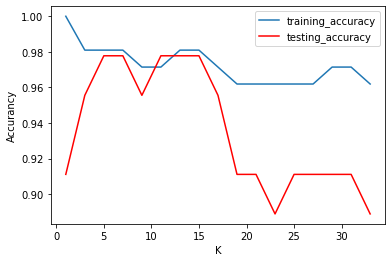

In [7]:
# Plot train and test accuracy
import matplotlib.pyplot as plt
%matplotlib inline

print("KNN Train Test Accuracy with respect to K")

plt.plot(k_range, training_accuracy_scores, label = "training_accuracy")
plt.plot(k_range, testing_accuracy_scores,color="red", label = "testing_accuracy")
plt.xlabel("K")
plt.ylabel("Accurancy")
plt.legend()
plt.show()

In [8]:
print("Best K = ", best_k)

Best K =  5


In [9]:
# Train on training data using 'Best K' and displaying the kNN performance on training data
knn_model = KNeighborsClassifier(n_neighbors=best_k)
knn_model.fit(X_train, y_train)

y_train_pred = knn_model.predict(X_train)
print("Training accuracy for best K = ", metrics.accuracy_score(y_train, y_train_pred))

Training accuracy for best K =  0.9809523809523809


In [10]:
start_time = time.time()
y_test_pred = knn_model.predict(X_test)

knn_testing_time = (time.time() - start_time)
print("Testing time for KNN %s seconds" % knn_testing_time)

testAccuracy = metrics.accuracy_score(y_test, y_test_pred)
print("Test accuracy for best K = ", testAccuracy)

Testing time for KNN 0.014989376068115234 seconds
Test accuracy for best K =  0.9777777777777777


# Section 2) Logistic Regression

In [11]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

In [12]:
start_time = time.time()
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

lg_training_time = (time.time() - start_time)
print("Training time for Logistic Regression is %s seconds" % lg_training_time)

Training time for Logistic Regression is 0.06296181678771973 seconds


In [13]:
start_time = time.time()
y_pred = logreg.predict(X_test)

lg_testing_time = (time.time() - start_time)
print("Testing time for Logistic Regression %s seconds" % lg_testing_time)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Testing time for Logistic Regression 0.001009225845336914 seconds
Accuracy of logistic regression classifier on test set: 0.93


In [14]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[18  0  0]
 [ 0 10  0]
 [ 0  3 14]]


In [15]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        18
Iris-versicolor       0.77      1.00      0.87        10
 Iris-virginica       1.00      0.82      0.90        17

       accuracy                           0.93        45
      macro avg       0.92      0.94      0.92        45
   weighted avg       0.95      0.93      0.93        45



# Section 3) Decision Tree

In [16]:
from sklearn.tree import DecisionTreeClassifier
# Fit the classifier with default hyper-parameters
start_time = time.time()
clf = DecisionTreeClassifier(random_state=1234)
model = clf.fit(X_train, y_train)

dt_training_time = (time.time() - start_time)
print("Training time for Decision Tree is %s seconds" % dt_training_time)

Training time for Decision Tree is 0.006997346878051758 seconds


In [17]:
from sklearn.metrics import accuracy_score
start_time = time.time()
y_pred_test = clf.predict(X_test)
print("Accuracy on test set with tree: {:.2f}".format(accuracy_score(y_test, y_pred_test)))

dt_testing_time = (time.time() - start_time)
print("Testing time for Decision Tree %s seconds" % dt_testing_time)

Accuracy on test set with tree: 0.93
Testing time for Decision Tree 0.002997875213623047 seconds


In [18]:
from sklearn.tree import DecisionTreeClassifier 
from sklearn import tree
text_representation = tree.export_text(clf)
print(text_representation)

|--- feature_2 <= 2.45
|   |--- class: Iris-setosa
|--- feature_2 >  2.45
|   |--- feature_3 <= 1.75
|   |   |--- feature_2 <= 5.35
|   |   |   |--- feature_0 <= 5.00
|   |   |   |   |--- feature_3 <= 1.35
|   |   |   |   |   |--- class: Iris-versicolor
|   |   |   |   |--- feature_3 >  1.35
|   |   |   |   |   |--- class: Iris-virginica
|   |   |   |--- feature_0 >  5.00
|   |   |   |   |--- class: Iris-versicolor
|   |   |--- feature_2 >  5.35
|   |   |   |--- class: Iris-virginica
|   |--- feature_3 >  1.75
|   |   |--- feature_2 <= 4.85
|   |   |   |--- feature_0 <= 6.05
|   |   |   |   |--- class: Iris-versicolor
|   |   |   |--- feature_0 >  6.05
|   |   |   |   |--- class: Iris-virginica
|   |   |--- feature_2 >  4.85
|   |   |   |--- class: Iris-virginica



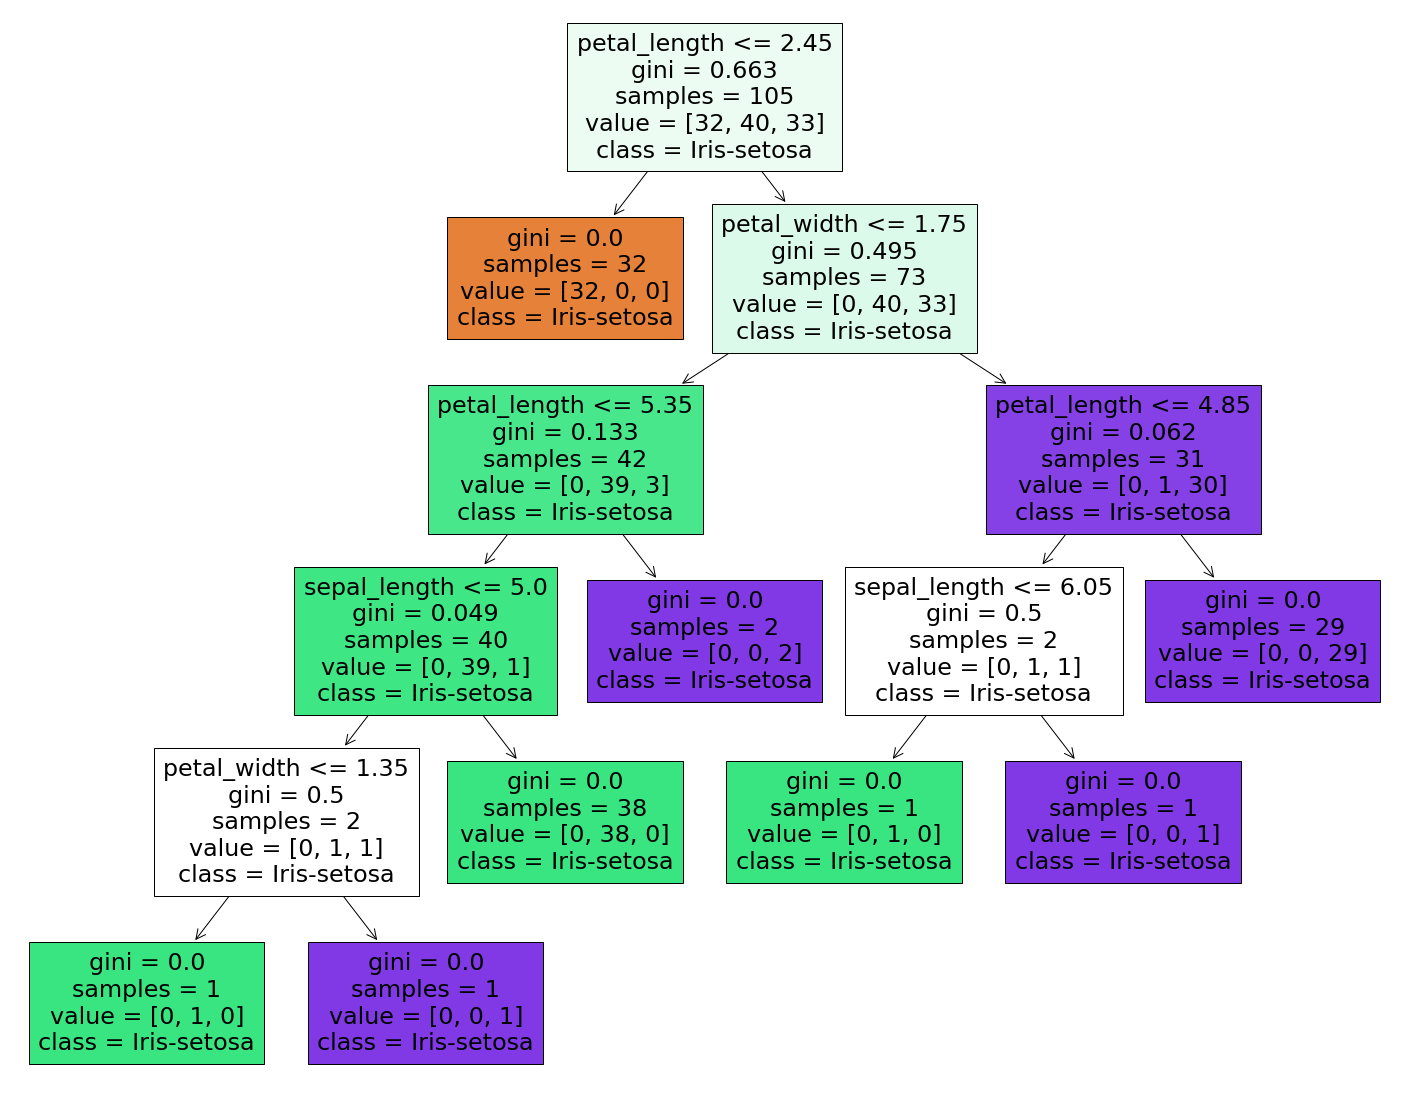

In [19]:
# kendim yazdığım için feature names kısmından emin değilim bi değerlendirelim. https://mljar.com/blog/visualize-decision-tree/ bu siteye göre doğru
#çıkıyor bence doğru sjdhsdhfgdsf
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(clf, 
                   feature_names=["sepal_length","sepal_width", "petal_length", "petal_width"],  
                   class_names=y,
                   filled=True)

# Section 4) OVA with SVM

In [20]:
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
import statistics

In [21]:
#find best degree

kfold=10
best_degree = 1
best_score = 0
scores = []

for i in range(1,10):
    svm_classifier = SVC(kernel="linear",degree=i)
    svmScores = cross_val_score(svm_classifier, X, y.ravel(), cv=kfold, scoring="accuracy")
    score = statistics.mean(svmScores)
    scores.append(score)
    
    if score > best_score:
        best_score=score
        best_degree=i
    print('Average accuracy in 10- fold cross-validation for SVM with degree',i , ' is ', score)

print("\n\nBest degree is",best_degree," with score ",best_score)

Average accuracy in 10- fold cross-validation for SVM with degree 1  is  0.9733333333333334
Average accuracy in 10- fold cross-validation for SVM with degree 2  is  0.9733333333333334
Average accuracy in 10- fold cross-validation for SVM with degree 3  is  0.9733333333333334
Average accuracy in 10- fold cross-validation for SVM with degree 4  is  0.9733333333333334
Average accuracy in 10- fold cross-validation for SVM with degree 5  is  0.9733333333333334
Average accuracy in 10- fold cross-validation for SVM with degree 6  is  0.9733333333333334
Average accuracy in 10- fold cross-validation for SVM with degree 7  is  0.9733333333333334
Average accuracy in 10- fold cross-validation for SVM with degree 8  is  0.9733333333333334
Average accuracy in 10- fold cross-validation for SVM with degree 9  is  0.9733333333333334


Best degree is 1  with score  0.9733333333333334


In [22]:
#find optimum C

scores = []
best_C = 1
best_score = 0
rangeC = 1000
for c in range(1,rangeC):
    svm_classifier = SVC(kernel="linear",degree=best_degree,C=c/100)
    svmScores = cross_val_score(svm_classifier, X, y.ravel(), cv=kfold, scoring="accuracy")
    score = statistics.mean(svmScores)
    scores.append(score)
    if score > best_score:
        best_score=score
        best_C=c/100
    #print('Average accuracy in 10- fold cross-validation for SVM with degree',best_degree ,"and C",c, ' is ', score)

print("\n\nBest C is",best_C," with score ",best_score)



Best C is 0.36  with score  0.9933333333333333


In [23]:
from sklearn.multiclass import OneVsRestClassifier

start_time = time.time()
svm_classifier = SVC(kernel="linear",degree=best_degree,C=best_C)
# define the ovr strategy
ovr = OneVsRestClassifier(svm_classifier)
# fit model
ovr.fit(X_train, y_train)
 
ova_training_time = (time.time() - start_time)
print("Training time for OVA with SVM is %s seconds" % ova_training_time)
start_time = time.time()
# make predictions
y_pred_test = ovr.predict(X_test)

ova_testing_time = (time.time() - start_time)
print("Accuracy on test set with tree: {:.2f}".format(accuracy_score(y_test, y_pred_test)))
print("Testing time for OVA with SVM is %s seconds" % ova_testing_time)

Training time for OVA with SVM is 0.014991283416748047 seconds
Accuracy on test set with tree: 0.96
Testing time for OVA with SVM is 0.0029976367950439453 seconds


# Section 5) OVO with SVM

In [24]:
from sklearn.multiclass import OneVsOneClassifier
from sklearn.svm import LinearSVC
start_time = time.time()
ovo = OneVsOneClassifier(svm_classifier).fit(X_train, y_train)
# fit model
ovo.fit(X_train, y_train)

ovo_training_time = (time.time() - start_time)
print("Training time for OVO with SVM is %s seconds" % ovo_training_time)
start_time = time.time()
# make predictions
y_pred_test = ovo.predict(X_test)
print("Accuracy on test set with tree: {:.2f}".format(accuracy_score(y_test, y_pred_test)))

ovo_testing_time = (time.time() - start_time)
print("Testing time for OVO with SVM is %s seconds" % ovo_testing_time)

Training time for OVO with SVM is 0.019990921020507812 seconds
Accuracy on test set with tree: 0.98
Testing time for OVO with SVM is 0.003998517990112305 seconds


# Section 6) Analyses 

#### Explain if your dataset is linearly separable or not:


Our dataset has 3 different (more than 2) classes. So, we cannot seperate classes linearly.

#### Compare the methods you used with regarding to test performance

<ul><li>Testing performance for KNN is 0.978 </li>
<li>Testing performance Logistic Regression is 0.93</li>
<li>Testing performance Decision Tree is 0.93</li>
<li>Testing performance OVA with SVM is 0.96</li>
<li>Testing performance OVO with SVM is 0.89.</li></ul>

KNN gived best performance because our dataset is small and we have just 3 classes. KNN method has reached better score because it classify data with noise better than others. Accuracy give different results in different methods depending on whether the dataset has a noise or not, the number of classes, and the size of the data. In order to find the method that gives the best result, it is necessary to try different methods by making analyzes.

In [25]:
print("\033[1mCompare the methods you used with regarding to training time\033[0m")
print()
print("Training time for KNN is " , knn_training_time, " seconds")
print("Training time for Logistic Regression is " , lg_training_time, " seconds")
print("Training time for Decision Tree is " , dt_training_time, " seconds")
print("Training time for OVA with SVM is " , ova_training_time, " seconds")
print("Training time for OVO with SVM is " , ovo_training_time, " seconds")

Compare the methods you used with regarding to training time

Training time for KNN is  0.0019974708557128906  seconds
Training time for Logistic Regression is  0.06296181678771973  seconds
Training time for Decision Tree is  0.006997346878051758  seconds
Training time for OVA with SVM is  0.014991283416748047  seconds
Training time for OVO with SVM is  0.019990921020507812  seconds


Training time for OVO is much longer than OVA. Because, if training complexity of OVA is K, then training complexity of OVO is K^2. Some algorithms (such as Support Vector Machine classifiers) scale poorly with the size of the training set, so for these algorithms OVO is preferred since it is faster to train many classifiers on small training sets than training few classifiers on large training sets.

In [26]:
print("\033[1mCompare the methods you used with regarding to testing time\033[0m")
print()
print("Testing time for KNN is " , knn_testing_time, " seconds")
print("Testing time for Logistic Regression is " , lg_testing_time, " seconds")
print("Testing time for Decision Tree is " , dt_testing_time, " seconds")
print("Testing time for OVA with SVM is " , ova_testing_time, " seconds")
print("Testing time for OVO with SVM is " , ovo_testing_time, " seconds")

Compare the methods you used with regarding to testing time

Testing time for KNN is  0.014989376068115234  seconds
Testing time for Logistic Regression is  0.001009225845336914  seconds
Testing time for Decision Tree is  0.002997875213623047  seconds
Testing time for OVA with SVM is  0.0029976367950439453  seconds
Testing time for OVO with SVM is  0.003998517990112305  seconds


Testing time for OVO with SVM is longer than the other methods.

#### Compare the methods you used with regarding to training time
<li>Training time for KNN is 0.01564311981201172 seconds</li>
<li>Training time for Logistic Regression is 0.12715673446655273 seconds</li>
<li>Training time for Decision Tree is 0.0019989013671875 seconds</li>
<li>Training time for OVA with SVM is 0.010991573333740234 seconds</li>
<li>Training time for OVO with SVM is 0.06495928764343262 seconds</li>

Training time for OVO is much longer than OVA. Because, if training complexity of OVA is K, then training complexity of OVO is K^2. Training time for decision tree is O(n*logn*d)-n: datapoints, d: dimensions- The time complexity for training time of KNN is O(1).  

#### Compare the methods you used with regarding to test time
<li>Testing time for KNN is 0.015993833541870117 seconds</li>
<li>Testing time for Logistic Regression is 0.0009987354278564453 seconds</li>
<li>Testing time for Decision Tree is 0.0029985904693603516 seconds</li>
<li>Testing time for OVA with SVM is 0.0069980621337890625 seconds</li>
<li>Testing time for OVO with SVM is 0.11393451690673828 seconds</li>

As we learned in lesson, all pairs is faster to train; one-vs-rest is faster at making predictions. Testing time for decision tree is O(depth). The time complexity for testing time of KNN is O(n). The time complexity for testing time of KNN is O(n). The time complexity of logistic regression is O(d). As we can see, testing time depends on many factors. These are depth of data, number of data.       

#### Comment on how you achieved best bias-variance-tradeoff for Section 1-5
For KNN, we calculated some of the K values and we draw ROC Curve. Then we selected optimum result for best testing performance. For logistic regression and decision tree we seperated data as train and test and calculated accuracy. For OVA with SVM, we used cross validation to find best degree and optimum c value. For OVO with SVM, we used train and test split function to calculate accuracy.

